In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.3.0'

In [28]:
tf.keras.__version__

'2.4.0'

In [29]:
from tensorflow import keras

In [30]:
from tensorflow.keras.datasets import mnist

In [31]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
y_train.shape

(60000,)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
y_test.shape

(10000,)

In [36]:
X_train[1200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 123, 198, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [37]:
import matplotlib.pyplot as plt

1


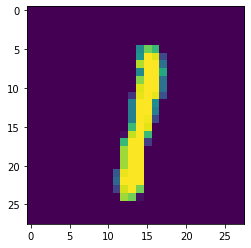

In [38]:
print(y_train[1200])
plt.imshow(X_train[1200])

#Before sending the images to model we will do these things
1.Scaling down the pixel value between 0 and 1  
2.Encoding label(dependent feature) using one hot encoding  
3.Flattening the input

In [39]:
X_train = X_train/255

In [40]:
X_train[1200]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

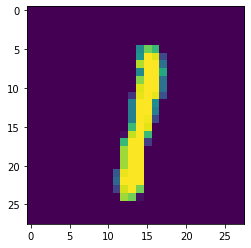

In [41]:
plt.imshow(X_train[1200])

In [42]:
y_train = tf.keras.utils.to_categorical(y_train)

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

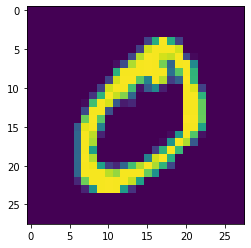

In [44]:
plt.imshow(X_train[1])

In [45]:
y_train.shape

(60000, 10)

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD


In [47]:
model = Sequential()  
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1024,activation=relu))
model.add(Dense(10,activation=softmax))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=SGD(),loss=categorical_crossentropy,metrics=["acc"])

In [51]:
model.fit(x = X_train,y = y_train,epochs = 20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6534 - acc: 0.8459 - val_loss: 0.3529 - val_acc: 0.9040
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3392 - acc: 0.9073 - val_loss: 0.2881 - val_acc: 0.9202
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2886 - acc: 0.9193 - val_loss: 0.2571 - val_acc: 0.9282
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2575 - acc: 0.9286 - val_loss: 0.2362 - val_acc: 0.9337
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2346 - acc: 0.9353 - val_loss: 0.2179 - val_acc: 0.9404
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2159 - acc: 0.9398 - val_loss: 0.2050 - val_acc: 0.9448
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2001 - acc: 0.9443 - val_loss: 0.1940 - val_acc: 0.9475
Epoch 8/20
1500/1500 [==============================] - 3s 2ms

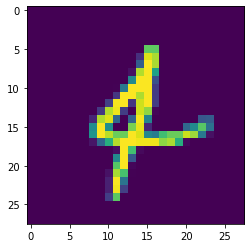

In [54]:
plt.imshow(X_test[300])


In [62]:
test_image = X_test[300]/255

In [63]:
test_image.shape

(28, 28)

In [57]:
import numpy as np


In [64]:
test_image_expanded = np.expand_dims(test_image,axis = 0)

In [65]:
test_image_expanded.shape

(1, 28, 28)

In [68]:
model.predict(test_image_expanded)

array([[0.00480413, 0.10530816, 0.02650813, 0.00415137, 0.6324351 ,
        0.00672241, 0.16993357, 0.04471371, 0.00297302, 0.00245044]],
      dtype=float32)

In [69]:
np.argmax(model.predict(test_image_expanded))

4

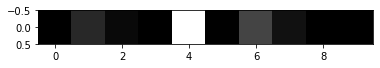

In [71]:
plt.imshow(model.predict(test_image_expanded),cmap = "gray")

In [72]:
x_test_scaled = X_test/255

In [73]:
y_pred = model.predict(x_test_scaled)

In [74]:
y_pred

array([[2.1915699e-05, 6.2341218e-07, 3.1073467e-04, ..., 9.9751818e-01,
        2.2263579e-05, 8.4669795e-05],
       [3.6123365e-05, 1.8835148e-04, 9.9807090e-01, ..., 5.0612153e-10,
        1.8206309e-04, 5.2932336e-10],
       [2.7524384e-05, 9.8673487e-01, 3.5047517e-03, ..., 5.5596572e-03,
        1.5714489e-03, 1.3740161e-04],
       ...,
       [3.1730733e-07, 3.7092857e-08, 1.5601978e-06, ..., 1.2278400e-04,
        9.3912642e-04, 1.3911895e-03],
       [7.4317390e-06, 1.0783232e-05, 1.2240563e-06, ..., 7.2923382e-07,
        8.1673008e-04, 6.9519371e-07],
       [3.3026601e-05, 3.1296469e-08, 1.5918637e-04, ..., 1.0178899e-09,
        3.5257824e-07, 5.0343914e-08]], dtype=float32)

In [75]:
y_predicted = np.argmax(y_pred,axis = 1)

In [76]:
y_predicted

array([7, 2, 1, ..., 4, 5, 6])

In [78]:
(y_test == y_predicted).mean()

0.9673